In [2]:
%pip install pandas numpy matplotlib scikit-learn seaborn

In [3]:
import pandas as pd

df = pd.read_csv('heart.csv')

duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
display(duplicate_rows)

print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")

Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1



Number of duplicate rows: 723


In [4]:
# Step 1: Identify Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:", numerical_features)

Numerical features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
find_na = df.isna()
print(find_na)

        age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   thal  target  
0       False  Fal

In [7]:
# Find the total number of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print("Total missing values per column:")
display(missing_values)

Total missing values per column:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
# Step 1: Select Columns
columns_to_scale = ['age', 'trestbps', 'cp', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
print("Columns to be scaled:", columns_to_scale)

Columns to be scaled: ['age', 'trestbps', 'cp', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
# Step 2 & 3: Choose and Initialize Scaler and Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply the scaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,-0.915755,-0.377636,212,0,0.891255,0.821321,0,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,1,-0.915755,0.479107,203,1,-1.004049,0.255968,1,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,1,-0.915755,0.764688,174,0,0.891255,-1.048692,1,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,1,-0.915755,0.936037,203,0,0.891255,0.516900,0,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,0,-0.915755,0.364875,294,1,0.891255,-1.874977,0,0.705408,-0.624121,2.179817,-0.522122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.055931,0.479107,221,0,0.891255,0.647366,1,-0.912329,0.995433,-0.731971,-0.522122,1
1021,0.613800,1,-0.915755,-0.377636,258,0,-1.004049,-0.352873,1,1.471705,-0.624121,0.238625,1.089852,0
1022,-0.819834,1,-0.915755,-1.234378,275,0,-1.004049,-1.353113,1,-0.060888,-0.624121,0.238625,-0.522122,0
1023,-0.488996,0,-0.915755,-1.234378,254,0,-1.004049,0.429923,0,-0.912329,0.995433,-0.731971,-0.522122,1


Correlation with the target variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


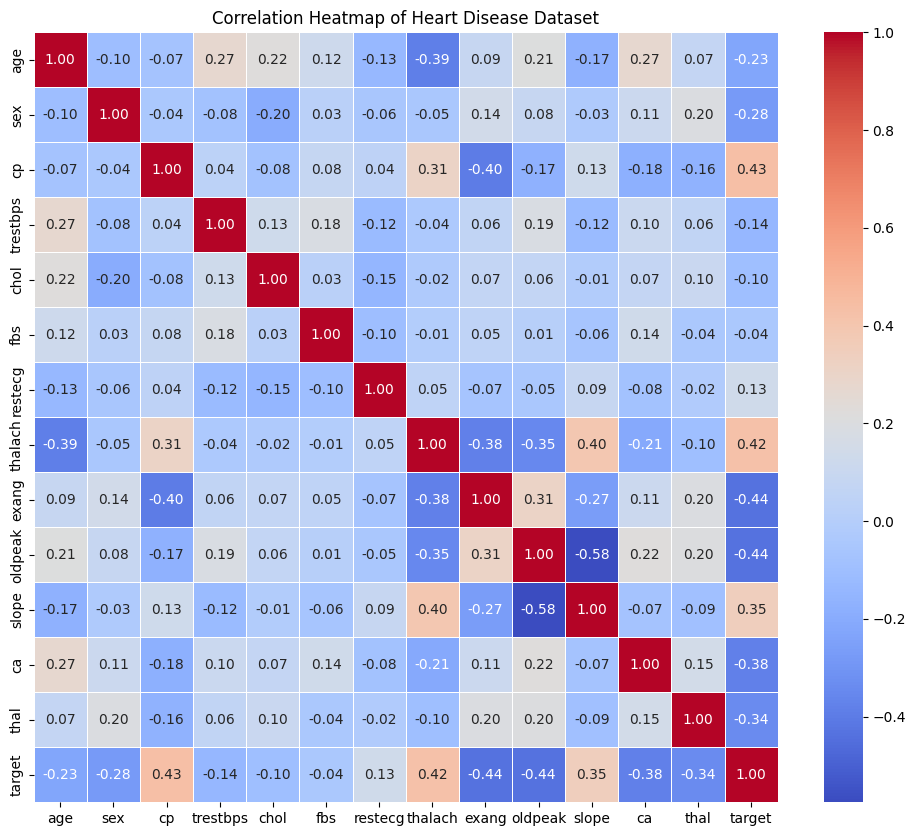

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with the target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# Display the correlations
print("Correlation with the target variable:")
print(target_correlation)

# Generate a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (768, 13)
Shape of X_test: (257, 13)
Shape of y_train: (768,)
Shape of y_test: (257,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [14]:
# Define the range of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid:", param_grid)

Hyperparameter grid: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [15]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
print("GridSearchCV initialized.")

GridSearchCV initialized.


In [16]:
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")

GridSearchCV fitting complete.


## Evaluate model

### Subtask:
Evaluate the performance of the best model found by GridSearchCV on the testing set.


**Reasoning**:
Evaluate the performance of the best model on the testing set by making predictions and calculating accuracy.



In [17]:
from sklearn.metrics import accuracy_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the best model on the testing set: {accuracy}")

Accuracy of the best model on the testing set: 0.9766536964980544


In [18]:
# Access the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Hyperparameters found by GridSearchCV:")
print(best_params)
print("\nBest Cross-Validation Score:")
print(best_score)

Best Hyperparameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-Validation Score:
0.9752143281555046


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model with the best hyperparameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
model = RandomForestClassifier(**best_params, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest model trained with best hyperparameters.")

Random Forest model trained with best hyperparameters.


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [1.         0.96103896 1.         0.97385621 0.94117647]
Mean cross-validation accuracy: 0.9752


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9767
Precision: 1.0000
Recall: 0.9520
F1-score: 0.9754
ROC-AUC: 0.9760


Business Observation -

The target (heart disease) is highly correlated with chest pain type (cp) and ST depression induced by exercise relative to rest (oldpeak), and highly inversely proportional with exercise induced angina (exang) and ST depression induced by exercise relative to rest (oldpeak).